<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2021/22 Term 2
</div>

# CS105 Group Project Submission

<font color=red size=4>
    Score:95%
</font>

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G3
#### Team: 8
#### Members:
1. Ng Zhi Hui Gerald
2. Su Liheng Benjamin
3. Seah Yi Niang
4. Tan Yao Long

#### Dataset: Housing Dataset

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

The dataset contains data from a census survey with regards to housing in a region. Various metrics that possibly impact housing prices are reflected within the dataset, such as crime rates, pollution levels and household income level among other metrics.

<font color = red size = 3>
   [1a] 3%
</font>

**b.** State the size of the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')

row_count, column_count = df.shape

print("Number of rows: ", row_count)
print("Number of columns: ", column_count)

Number of rows:  506
Number of columns:  14


The dataset contains 506 rows and 14 columns.

<font color = green
 size = 3>
   [1b] 1%. Should show working
</font>

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

ID represents the identification number of a town and is of categorical data type.

Crime_Rate represents the crime rate per capita in the town and is of categorical data type. Crime_Rate can take the value: "High", "Moderate", "Low".

Residential_Area represents the proportion of residential area in the town and is of categorical data type. Residential_Area can take the value: "Very High", "High", "Moderate", "Low", "Very Low".

Non_Retail represents the percentage of business areas used for non-retail and is of numerical data type. 

River represents whether the town is near a bridge and is of cetegorical data type. River can take the value: "Near", "Far".

Pollutants represents the concentration of pollutants in parts per 10 million and is of numerical data type. 

Rooms represent the number of rooms per unit and is of numerical data type. 

Old_Housing represents the percentage of units built before second world war and is of numerical data type. 

Distance_Office represents the weighted distance of the town to major office areas and is of numerical data type. 

Highway_Access representst he accessibility of the town to major highways and is of categorical data type. Highway_Access can take the value: "High", "Moderate", "Low".

Tax_Rate refers to the property tax rate per $10,000 and is of numerical data type. 

Student_Teacher_Ratio refers to the student to teacher ratio and is of numerical data type. 

Low_Income represents the percentage of low income households in the town and is of numerical data type. 

Price represents the median price of homes in $1000s and is of numerical data type.

<font color = green size = 3>
   [1c] 9%. Should indicate the possible values for the categorical variables
</font>

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [ ]:
# identify columns in empty fields
df = pd.read_csv('housing.csv')
df.count()

ID                       488
Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           491
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

In [ ]:
# there are empty fields within the "ID" and "Highway_Access" cols (since count < 506)
# find modal value of Highway_Access col 
n_rows, n_cols = df.shape 
df.count()/n_rows

ID                       0.964427
Crime_Rate               1.000000
Residential_Area         1.000000
Non_Retail               1.000000
River                    1.000000
Pollutants               1.000000
Rooms                    1.000000
Old_Housing              1.000000
Distance_Office          1.000000
Highway_Access           0.970356
Tax_Rate                 1.000000
Student_Teacher_Ratio    1.000000
Low_Income               1.000000
Price                    1.000000
dtype: float64

Highway_Access has less than 10% of missing data and since Highway_Access is a categorical variable, we would impute with mode.

In [ ]:
# modal value of Highway_Access col is "Moderate"
# impute the the empty fields in "Highway_Access" columns with "Moderate"
highway_access_mode = df.Highway_Access.mode()[0]
df.Highway_Access.fillna(highway_access_mode, inplace=True)
df.count()

ID                       488
Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

<font color = green size = 3>
   What is the rationale for imputing with mode?
</font>

We decided to drop the column "ID" because "ID" does not have any predictive power.

In [ ]:
#df.dropna(inplace=True)
df.drop(columns=["ID"], inplace=True)
df.count()

Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

<font color = green size = 3>
   Another possible approach is to just drop ID column altogether since ID has no predictive power.
</font>

<font color = red size = 3>
   [2a] 15%
</font>

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

In [ ]:
# generate 5 number summary
cols = set(df.columns) - {'ID'}
df = df[list(cols)]
df.describe()

,Student_Teacher_Ratio,Low_Income,Price,Pollutants,Old_Housing,Tax_Rate,Distance_Office,Rooms,Non_Retail
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,19.426680,13.514111,22.532806,0.554695,69.110474,408.237154,3.795043,11.002182,11.136779
std,12.752782,11.206621,9.197104,0.115878,28.339548,168.537116,2.105710,51.744882,6.860353
min,12.600000,1.730000,5.000000,0.385000,2.900000,187.000000,1.129600,3.561000,0.460000
25%,17.400000,7.037500,17.025000,0.449000,45.175000,279.000000,2.100175,5.888000,5.190000
50%,19.100000,11.430000,21.200000,0.538000,78.200000,330.000000,3.207450,6.214000,9.690000
75%,20.200000,17.117500,25.000000,0.624000,94.575000,666.000000,5.188425,6.634000,18.100000
max,182.000000,100.000000,50.000000,0.871000,102.000000,711.000000,12.126500,609.600000,27.740000


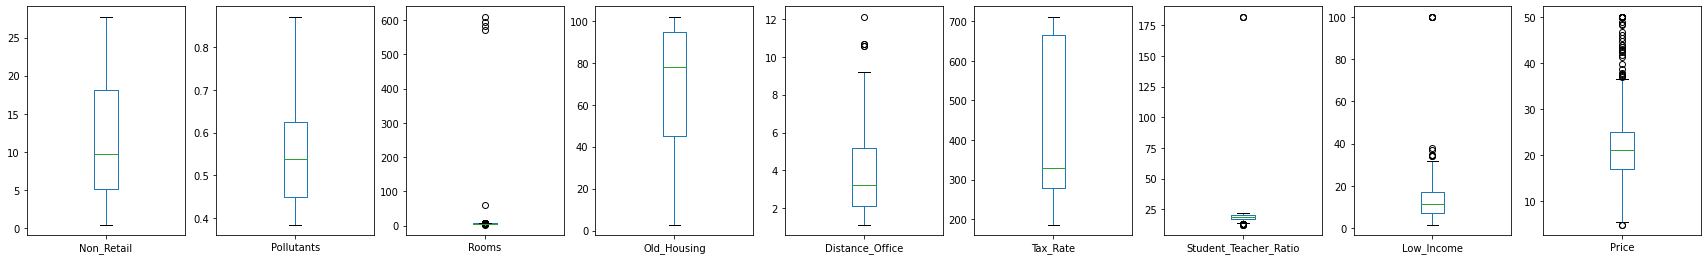

In [ ]:
# plot box plots for each data field
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio", "Low_Income", "Price"]]
df_numerics.plot(kind='box', subplots=True, layout=(20, 9), figsize=(30, 100))

plt.show()

After plotting the boxplot, we can see that variable Rooms, Student_Teacher_Ratio, Distance_Office and Low_income of the variables that contains extreme outliers in the datapoints as compared to the majority spread of datapoints, such as within the IQR.

Additionally, maximum value for "Old_Housing" is 102%, indicating that the percentage of units built prior to WW2 exceeds 100% which is not a possible value. The maximum value for 'Rooms' is 609 and logically, it is impossible for a house to have so many rooms.

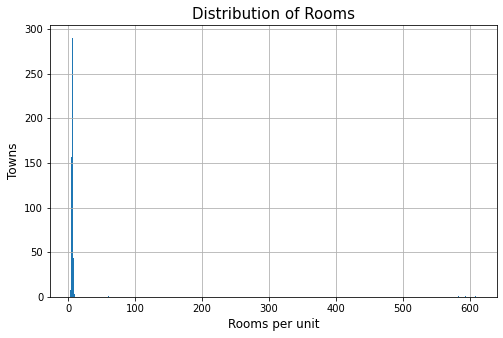

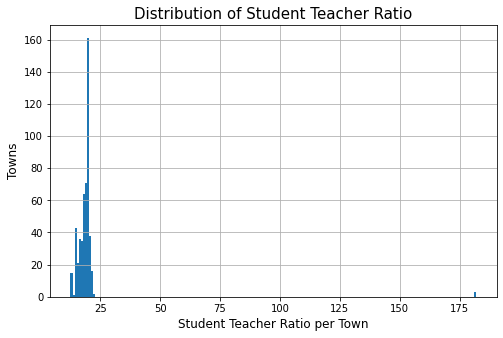

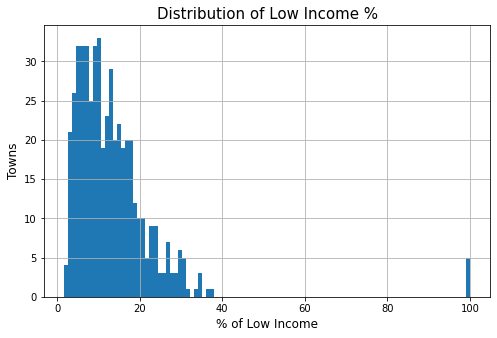

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Rooms", fontsize=15)
plt.xlabel("Rooms per unit", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df['Rooms'].hist(bins=500)
plt.show()


plt.figure(figsize=(8,5))
plt.title("Distribution of Student Teacher Ratio", fontsize=15)
plt.xlabel("Student Teacher Ratio per Town", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df["Student_Teacher_Ratio"].hist(bins=200)
plt.show()

plt.figure(figsize=(8,5))
plt.title("Distribution of Low Income %", fontsize=15)
plt.xlabel("% of Low Income", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df["Low_Income"].hist(bins=100)
plt.show()

After seeing the boxplot, we used the histogram to better visualize each distribution that are present in the boxplot and this further amplify that the presence of outlier in the data will cause inconsistency issue in the distribution of the dataset when the graph is plotted.

Hence, we will omit data points for rooms, student-to-teacher ratio, income level, distance from office that are outside of +/- 1.5*IQR, as well as "old_housing" values above 100. Price is the dependent variable hence, there is no need to remove the outliers as the variations in values of Price is likely to be due to different variables.

In [ ]:
RoomIQR = df.Rooms.quantile(0.75) - df.Rooms.quantile(0.25) 
RoomUpper = df.Rooms.quantile(0.75) + 1.5*RoomIQR 
RoomLower = df.Rooms.quantile(0.25) - 1.5*RoomIQR 
 
StudentRatioIQR = df.Student_Teacher_Ratio.quantile(0.75) - df.Student_Teacher_Ratio.quantile(0.25) 
StudentRatioUpper = df.Student_Teacher_Ratio.quantile(0.75) + 1.5*StudentRatioIQR 
StudentRatioLower = df.Student_Teacher_Ratio.quantile(0.25) - 1.5*StudentRatioIQR 
 
IncomeIQR = df.Low_Income.quantile(0.75) - df.Low_Income.quantile(0.25) 
IncomeUpper = df.Low_Income.quantile(0.75) + 1.5*IncomeIQR 
IncomeLower = df.Low_Income.quantile(0.25) - 1.5*IncomeIQR 
 
DistanceIQR = df.Distance_Office.quantile(0.75) - df.Distance_Office.quantile(0.25) 
DistanceUpper = df.Distance_Office.quantile(0.75) + 1.5*DistanceIQR 
DistanceLower = df.Distance_Office.quantile(0.25) - 1.5*DistanceIQR 

# omit data points outside of IQR * 1.5
df1 = df[ (df.Old_Housing <= 100) &((df.Rooms < RoomUpper) & (df.Rooms > RoomLower)) & ((df.Student_Teacher_Ratio < StudentRatioUpper) & (df.Student_Teacher_Ratio > StudentRatioLower)) & ((df.Low_Income < IncomeUpper) & (df.Low_Income > IncomeLower)) & ((df.Distance_Office < DistanceUpper) & (df.Distance_Office > DistanceLower)) ]  
df1

,River,Student_Teacher_Ratio,Highway_Access,Low_Income,Crime_Rate,Price,Pollutants,Old_Housing,Residential_Area,Tax_Rate,Distance_Office,Rooms,Non_Retail
0,Far,15.3,Low,4.98,Low,24.0,0.538,65.2,Very Low,296,4.0900,6.575,2.31
1,Far,17.8,Low,9.14,Low,21.6,0.469,78.9,Very Low,242,4.9671,6.421,7.07
2,Far,17.8,Low,4.03,Low,34.7,0.469,61.1,Very Low,242,4.9671,7.185,7.07
3,Far,18.7,Low,2.94,Low,33.4,0.458,45.8,Very Low,222,6.0622,6.998,2.18
4,Far,18.7,Low,5.33,Low,36.2,0.458,54.2,Very Low,222,6.0622,7.147,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Far,21.0,Low,9.67,Low,22.4,0.573,69.1,Very Low,273,2.4786,6.593,11.93
502,Far,21.0,Low,9.08,Low,20.6,0.573,76.7,Very Low,273,2.2875,6.120,11.93
503,Far,21.0,Low,5.64,Low,23.9,0.573,91.0,Very Low,273,2.1675,6.976,11.93
504,Far,21.0,Low,6.48,Low,22.0,0.573,89.3,Very Low,273,2.3889,6.794,11.93


Remaining rows after dropping rows with values outside of IQR * 1.5, hence 506 - 433 = 73 data points with outliers were removed

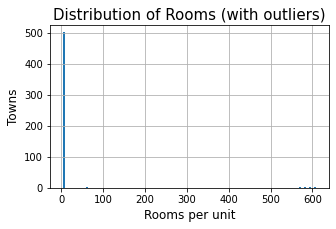

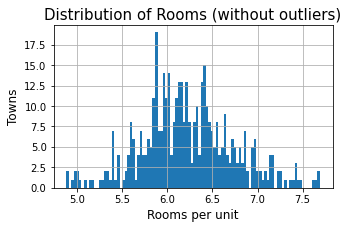

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Rooms (with outliers)", fontsize=15)
plt.xlabel("Rooms per unit", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df["Rooms"].hist(bins=100)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Rooms (without outliers)", fontsize=15)
plt.xlabel("Rooms per unit", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Rooms"].hist(bins=100)
plt.show()

The two graphs above depict the changes to the distribution of rooms per unit after outliers were removed. Before removing, we can see that most of the datapoints are on the left and there are some extreme outlier on the right side of the graph, it shows the inconsistency in the spread of data. After removing outliers, the range of values would be smaller and hence, the distribution of the data can be observed more easily.

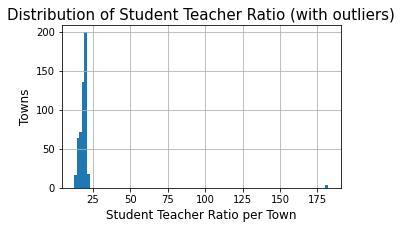

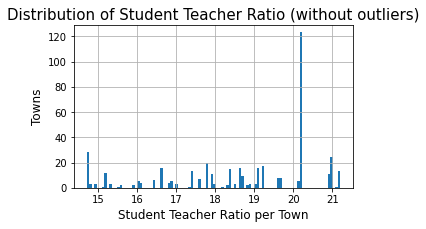

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Student Teacher Ratio (with outliers)", fontsize=15)
plt.xlabel("Student Teacher Ratio per Town", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df["Student_Teacher_Ratio"].hist(bins=100)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Student Teacher Ratio (without outliers)", fontsize=15)
plt.xlabel("Student Teacher Ratio per Town", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Student_Teacher_Ratio"].hist(bins=100)
plt.show()

The two graphs above depict the changes to the distribution of student teacher ratio distribution after outliers were removed. After the outliers were removed, the range of values is smaller thus the distribution seems more consistent with the data where there is a major spike in the town where the student-teacher ratio is at about 20.2.

<font color = green size = 3>
   The x-axis have different intervals, hence it is difficult to compare visually
</font>

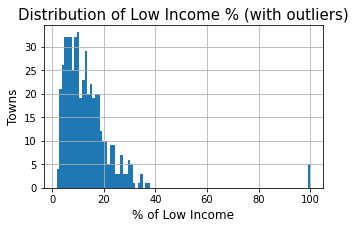

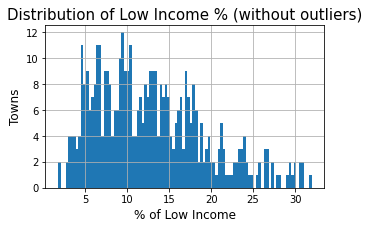

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Low Income % (with outliers)", fontsize=15)
plt.xlabel("% of Low Income", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df["Low_Income"].hist(bins=100)
plt.show()


plt.figure(figsize=(5,3))
plt.title("Distribution of Low Income % (without outliers)", fontsize=15)
plt.xlabel("% of Low Income", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Low_Income"].hist(bins=100)
plt.show()

The two graphs above depict the changes to the distribution of percentage of low income per town after outliers were removed. There is a significant improvement in the distribution and the spread of the datapoints.

<font color = red size = 3>
   [2b] 15%
</font>

**c.** For categorical variables, perform the necessary encoding.

In [ ]:
# removes default warning 
pd.options.mode.chained_assignment = None

# encode categorical variables
Highway_encoded = {'Low': 1, 'Moderate': 2, 'High': 3}
df1['Highway_Access_Encoded'] = df1['Highway_Access'].map(Highway_encoded)

Crime_encoded = {'Low': 1, 'Moderate': 2, 'High': 3}
df1['Crime_Rate_Encoded'] = df1['Crime_Rate'].map(Crime_encoded)

Residential_encoded = {'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5}
df1['Residential_Encoded'] = df1['Residential_Area'].map(Residential_encoded)

River_encoded = {'Near': 1, 'Far': 2}
df1['River_Encoded'] = df1['River'].map(River_encoded)

# check that categorical variables successfully encoded
df1

,River,Student_Teacher_Ratio,Highway_Access,Low_Income,Crime_Rate,Price,Pollutants,Old_Housing,Residential_Area,Tax_Rate,Distance_Office,Rooms,Non_Retail,Highway_Access_Encoded,Crime_Rate_Encoded,Residential_Encoded,River_Encoded
0,Far,15.3,Low,4.98,Low,24.0,0.538,65.2,Very Low,296,4.0900,6.575,2.31,1,1,1,2
1,Far,17.8,Low,9.14,Low,21.6,0.469,78.9,Very Low,242,4.9671,6.421,7.07,1,1,1,2
2,Far,17.8,Low,4.03,Low,34.7,0.469,61.1,Very Low,242,4.9671,7.185,7.07,1,1,1,2
3,Far,18.7,Low,2.94,Low,33.4,0.458,45.8,Very Low,222,6.0622,6.998,2.18,1,1,1,2
4,Far,18.7,Low,5.33,Low,36.2,0.458,54.2,Very Low,222,6.0622,7.147,2.18,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Far,21.0,Low,9.67,Low,22.4,0.573,69.1,Very Low,273,2.4786,6.593,11.93,1,1,1,2
502,Far,21.0,Low,9.08,Low,20.6,0.573,76.7,Very Low,273,2.2875,6.120,11.93,1,1,1,2
503,Far,21.0,Low,5.64,Low,23.9,0.573,91.0,Very Low,273,2.1675,6.976,11.93,1,1,1,2
504,Far,21.0,Low,6.48,Low,22.0,0.573,89.3,Very Low,273,2.3889,6.794,11.93,1,1,1,2


<font color = green size = 3>
   [2c] 4% Why ordinal encoding?
</font>

We opted to use ordinal encoding to transform categorical variables from strings to numerical variables in a meaningful manner, such that they may be plotted in a box plot when finding meaningful relationships between them and price. For example, crime rate has been encoded logically, wherein a higher value of 3 corresponds to a 'high' crime rate, while a lower value of 1 corresponds to a 'low' crime rate. This ensures the categorical variables are represented meaningfully, as opposed to assignment of categorical variables in alphabetical order.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

In [ ]:
# generate 5 number summary following removal of outliers and encoding
df2 = df1.copy(deep=True)
cols = set(df2.columns) - {'ID', 'Residential_Encoded', 'River_Encoded', 'Crime_Rate_Encoded', 'Highway_Access_Encoded'}
df2 = df2[list(cols)]
df2.describe()

,Student_Teacher_Ratio,Low_Income,Price,Pollutants,Old_Housing,Tax_Rate,Distance_Office,Rooms,Non_Retail
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,18.644111,12.796328,21.320323,0.554743,68.127483,412.127021,3.822019,6.223716,11.443949
std,1.933649,6.544647,7.580222,0.116618,28.347889,168.887208,2.018033,0.512749,6.788794
min,14.700000,1.730000,5.000000,0.385000,2.900000,188.000000,1.129600,4.880000,0.740000
25%,17.400000,7.530000,16.600000,0.449000,44.400000,284.000000,2.122200,5.888000,5.640000
50%,19.100000,12.010000,20.800000,0.538000,76.700000,345.000000,3.272100,6.182000,9.900000
75%,20.200000,17.090000,24.400000,0.624000,94.000000,666.000000,5.287300,6.525000,18.100000
max,21.200000,31.990000,50.000000,0.871000,100.000000,711.000000,9.222900,7.691000,27.740000


In [ ]:
# Percentage of distribution of Highway Access Proximity
df1.Highway_Access.value_counts()/n_rows

Moderate    0.488142
High        0.223320
Low         0.144269
Name: Highway_Access, dtype: float64

In [ ]:
# Percentage of area that is allocated to residential areas
df1.Residential_Area.value_counts()/n_rows

Very Low     0.677866
Low          0.088933
Very High    0.037549
Moderate     0.035573
High         0.015810
Name: Residential_Area, dtype: float64

In [ ]:
# Percentage of distribution of Crime Rates in different towns
df1.Crime_Rate.value_counts()/n_rows

Low         0.648221
Moderate    0.179842
High        0.027668
Name: Crime_Rate, dtype: float64

<font color = green size = 3>
   [3a] 8% Most of the measures like mean, std, min, max do not apply for categorical variables
</font>

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

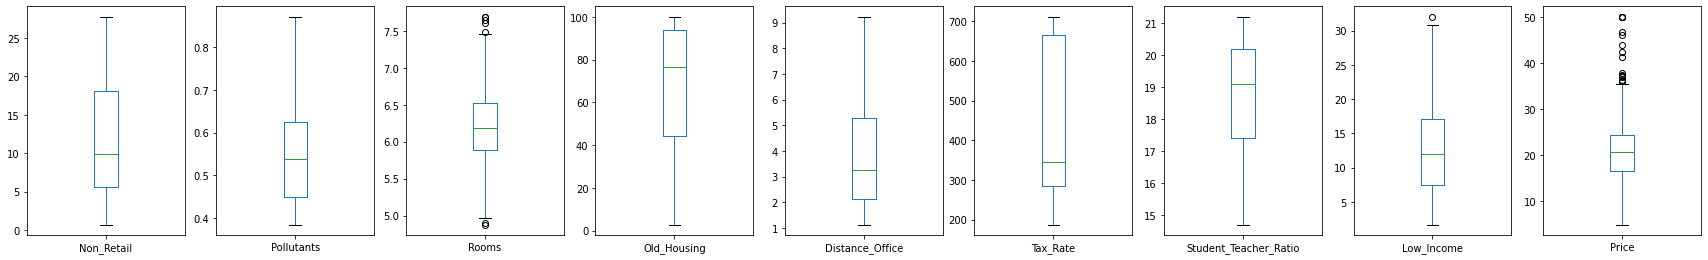

In [ ]:
# plot box plots for numerical data fields
df_numerics = df1[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio", "Low_Income", "Price"]]
df_numerics.plot(kind='box', subplots=True, layout=(20, 9), figsize=(30, 100))

plt.show()

After cleaning up the dataset, the plots of the variables has significantly fewer extreme outliers within the datapoint, only Rooms and Price contains outliers. However, there is no need to further remove outliers from Room. This is because outliers are values that are larger than the boundary of (upper quartile + 1.5* IQR) and values that are smaller than (lower quartile + 1.5 * IQR), but the difference between the extreme values and the boundary values are not significant.  

From the boxplot, it is slightly harder to describe the distribution of its values, but we can generally tell the skewness of the datapoints. For 'Non Retail', 'Pollutants', 'Tax_Rate', 'Low Income' and 'Distance Office', the boxplot is slightly positive-skewed. For 'Old Housing' and 'Student Teacher Ratio', it is skewed negatively in the boxplot.

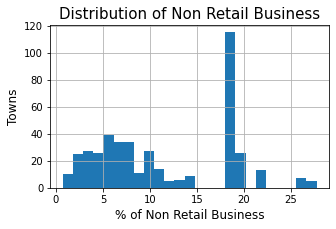

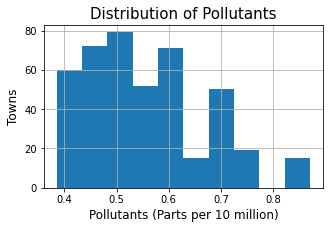

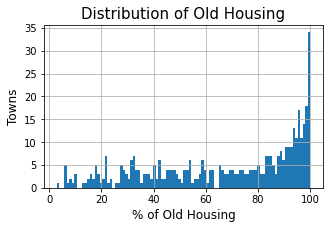

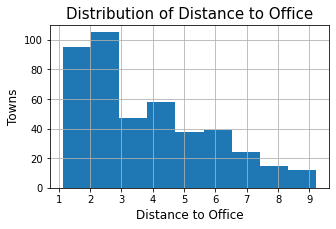

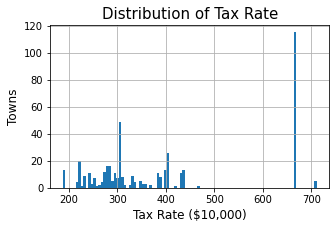

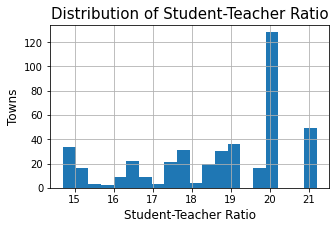

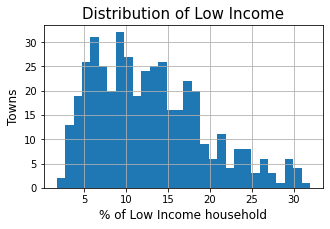

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Non Retail Business", fontsize=15)
plt.xlabel("% of Non Retail Business", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Non_Retail"].hist(bins=25)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Pollutants", fontsize=15)
plt.xlabel("Pollutants (Parts per 10 million)", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Pollutants"].hist(bins=10)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Old Housing", fontsize=15)
plt.xlabel("% of Old Housing", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Old_Housing"].hist(bins=100)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Distance to Office", fontsize=15)
plt.xlabel("Distance to Office", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Distance_Office"].hist(bins=9)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Tax Rate", fontsize=15)
plt.xlabel("Tax Rate ($10,000)", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Tax_Rate"].hist(bins=100)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Student-Teacher Ratio", fontsize=15)
plt.xlabel("Student-Teacher Ratio", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Student_Teacher_Ratio"].hist(bins=20)
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Low Income", fontsize=15)
plt.xlabel("% of Low Income household", fontsize=12)
plt.ylabel("Towns", fontsize=12)
df1["Low_Income"].hist(bins=30)
plt.show()

Furthermore, by plotting histogram of each data set, we are able to identify the bimodal distribution of tax rates.

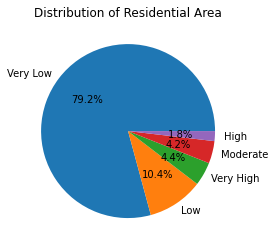

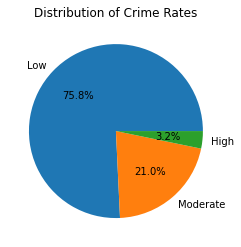

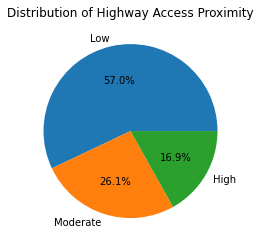

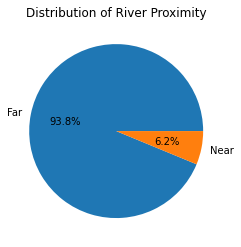

In [ ]:
# Plot Pie Chart for categorical data
# proportion of residential areas
residentialarea= df1['Residential_Area'].value_counts(normalize='index')
mylabels = ["Very Low", "Low", "Very High", "Moderate", "High"]
plt.title('Distribution of Residential Area')
plt.pie(residentialarea, labels = mylabels, autopct='%.1f%%')
plt.show()

# crime rates
crime = df1['Crime_Rate'].value_counts(normalize='index')
mylabels = ["Low", "Moderate", "High"]
plt.title('Distribution of Crime Rates')
plt.pie(crime, labels = mylabels, autopct='%.1f%%')
plt.show()


# Highway Access
highway = df1['Highway_Access'].value_counts(normalize='index')
mylabels = ["Low", "Moderate", "High"]
plt.title('Distribution of Highway Access Proximity')
plt.pie(highway, labels = mylabels, autopct='%.1f%%')
plt.show()


# Proximity to bridges
river = df1['River'].value_counts(normalize='index')
mylabels = ["Far", "Near"]
plt.title('Distribution of River Proximity')
plt.pie(river, labels = mylabels, autopct='%.1f%%')
plt.show()

78.8% of the towns have a very low proportion of residential areas.
75.4% of the towns have low crime rates. 
56.8% of the towns has a moderate distance to access the major highway.
93.8% of the towns are far away from bridge.  



<observations>

<font color=red size=4>
    [3b] 20%
</font>

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

### Pollutants & Price

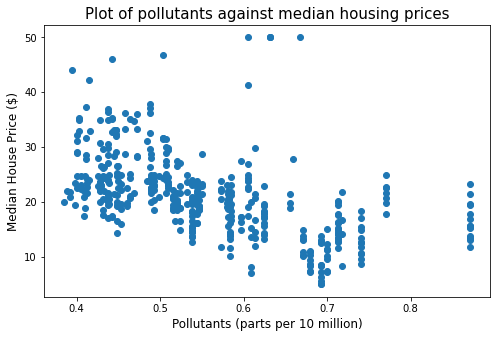

Correlation Coefficient = -0.5077488145699018


In [ ]:
# pollutants & price
xs = df1.Pollutants
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of pollutants against median housing prices", fontsize=15)
plt.ylabel("Median House Price ($)", fontsize=12)
plt.xlabel("Pollutants (parts per 10 million)", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

We opted to investigate the relationship between median house prices and pollution level since we hypothesized that a greater pollution level in a town would decrease demand for housing and thus suppress pricing.

From both the shape of the scatter plot and the correlation coefficient calculated of -0.506,
we may infer that there is a moderate negative correlation between median housing price and pollutants, as such as the level of pollutants increase, median house prices decreases.

### Rooms & Price

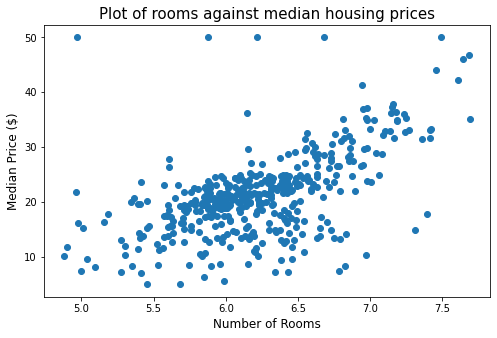

Correlation Coefficient = 0.5736168916385351


In [ ]:
# rooms & price
xs = df1.Rooms
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of rooms against median housing prices", fontsize=15)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xlabel("Number of Rooms", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

We opted to investigate the relationship between median house prices and number of rooms since we hypothesized that houses with more rooms would be more desirable and thus fetch greater prices.

From both the shape of the scatter plot and the correlation coefficient calculated of 0.572,
we may infer that there is a moderate positive correlation between median housing price and number of rooms, as such as the median number of rooms increase, median house prices increases.

### Old Housing Percentage & Price

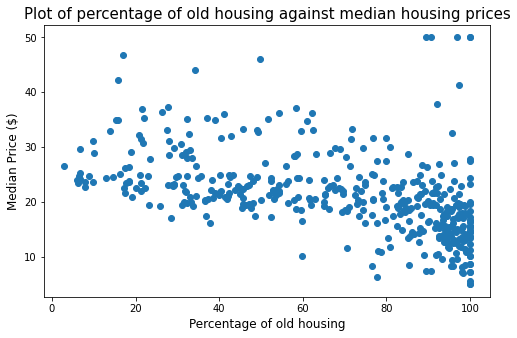

Correlation Coefficient = -0.4763732437295467


In [ ]:
# old housing perc & price
xs = df1.Old_Housing
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of percentage of old housing against median housing prices", fontsize=15)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xlabel("Percentage of old housing", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

We opted to investigate the relationship between percentage of old housing and median house prices since we hypothesized that older housing would be less desirable and thus suppress pricing.

From both the shape of the scatter plot and the correlation coefficient calculated of -0.479,
we may infer that there is a moderate negative correlation between median housing price and percentage of old housing, as such as the percentage of old housing increases, median house prices decreases.

### Distance & Price

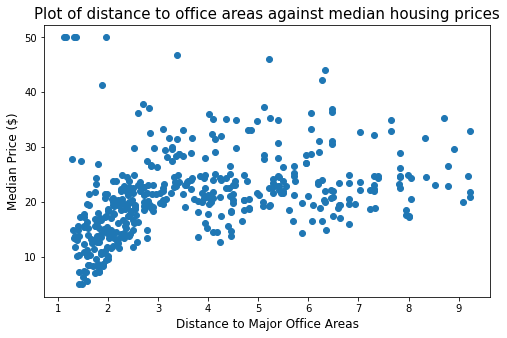

Correlation Coefficient = 0.3560007605943892


In [ ]:
# distance & price
xs = df1.Distance_Office
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of distance to office areas against median housing prices", fontsize=15)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xlabel("Distance to Major Office Areas", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

We chose to investigate the relationship between distance to major office areas and median house prices since we hypothesized that closer proximity to office areas would result in a greater demand due to the greater ease of commuting to work.

From both the shape of the scatter plot and the correlation coefficient calculated of 0.354,
we may infer that there is a weak positive correlation between median housing price and distance to major office areas. This implies that the distance to major office areas is a weak determinant of house prices which may be more greatly affected by other metrics.

### Student Teacher Ratio & Price

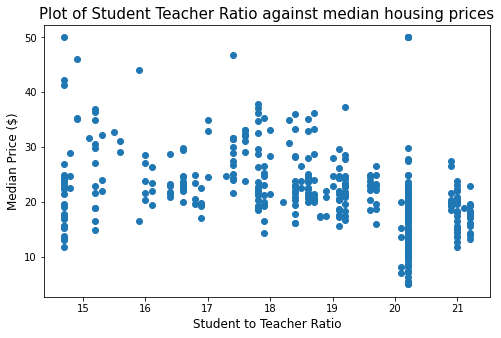

Correlation Coefficient = -0.40016801679239294
Covariance = -5.865458739628774


In [ ]:
# Stu-Teacher Ratio & price
xs = df1.Student_Teacher_Ratio
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Student Teacher Ratio against median housing prices", fontsize=15)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xlabel("Student to Teacher Ratio", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

# find covariance
cov = np.cov(xs, ys)
print("Covariance = " + str(cov[0][1]))

Our team decided to analyse this pair because we feel that having a low student to teacher ratio is important for a child's education, and it would play a factor in deciding a house's price. 

From both the shape of the scatter plot and the correlation coefficient calculated of -0.400. 
We may infer that there is a weak negative correlation between median housing price and student to teacher ratio. This means that as the student to teacher ratio increases, the median house prices decrease.

### Income Level & Price

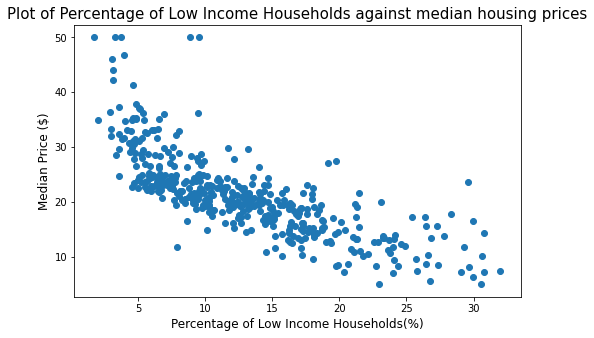

Correlation Coefficient = -0.764234725261504


In [ ]:
# Income level & price
xs = df1.Low_Income
ys = df1.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Percentage of Low Income Households against median housing prices", fontsize=15)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xlabel("Percentage of Low Income Households(%)", fontsize=12)
plt.show()

# find corr coef
corr = np.corrcoef(xs, ys)
print("Correlation Coefficient = " + str(corr[0][1]))

Our team decided to analyse this pair because we had the inclination that having a higher percentage of low households would lead to a town being more undesirable thus leading to a lower median house price.

From both the shape of the scatter plot and the correlation coefficient calculated of -0.773.
We may infer that there is a strong negative correlation between median housing price and percentage of low income households. This means that as the percentage of low income households increases, the median house prices generally decreases.

### Crime Rate & Price

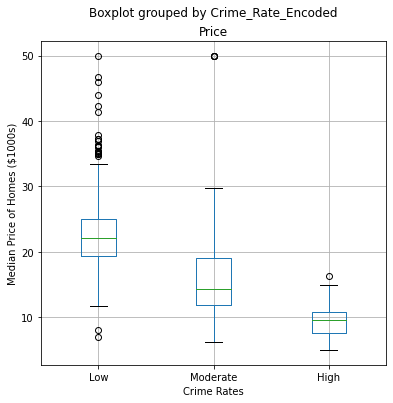

In [ ]:
df1[['Price','Crime_Rate_Encoded']].boxplot(by='Crime_Rate_Encoded', figsize=(6, 6))
plt.xticks([1, 2, 3], ['Low', 'Moderate', 'High'])
plt.xlabel('Crime Rates')
plt.ylabel('Median Price of Homes ($1000s)')
plt.show()

Since greater crime rates pose greater risk to home owners, we hypothesized that regions with higher crime rates would have lower home prices.

The boxplot reveals that as crime rates rise from low to moderate, the median of home prices decreases from approximately $23 000 to $14 000, and further decreases to approximately $9 800 for towns categorized with "high" crime rates, thus indicating a positive correlation between crime rates and price of homes. 

Additionally, we observed that the range for towns categorized with 'High' crime rates is smaller than that of the 'low' and 'moderate' plots, indicates that home prices fall within a smaller range in towns with 'High' crime.

### Highway Access & Price

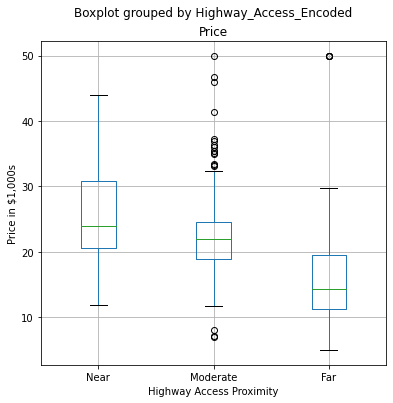

In [ ]:
df1[['Price','Highway_Access_Encoded']].boxplot(by='Highway_Access_Encoded', figsize = (6, 6))
plt.xticks([1, 2, 3], ['Near', 'Moderate', 'Far'])
plt.xlabel('Highway Access Proximity')
plt.ylabel('Price in $1,000s')
plt.show()

We suspected that greater highway access results in greater convenience, potentially increasing housing prices

The boxplot reveals that as highway access increases from near to moderate, the median of home prices decreases from approximately $24 000 to $22 000, further decreasing to approximately $14 000 for towns 'far' from the highway, thus indicating a positive correlation between highway access proximity and the median price of homes. 

### Crime Rate & Low Income

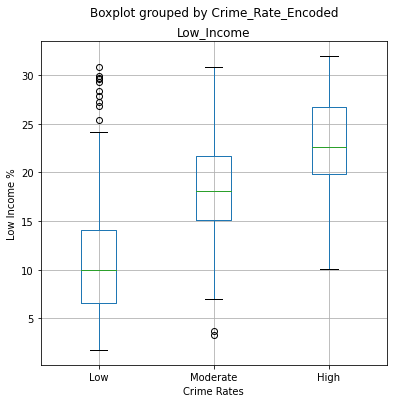

In [ ]:
df1[['Low_Income','Crime_Rate_Encoded']].boxplot(by='Crime_Rate_Encoded', figsize = (6, 6))
plt.xticks([1, 2, 3], ['Low', 'Moderate', 'High'])
plt.xlabel('Crime Rates')
plt.ylabel('Low Income %')
plt.show()

We suspected that towns with higher percentage of low income households might result in more townspeople turning to crime, hence translating to higher crime rates.

The boxplot depicts that towns with low crime rates had a smaller percentage of low income households of approximately 10%, which rises to around 17% in towns with moderate crime rates, and 22% in towns with high crime rates.

<font color=red size=4>
    [3c] 20%
</font>

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

A regression problem would be to predict median home prices in a town based on selected explanatory variables, while a classification problem is predicting categorical crime rates of a town, which may fall within the "low", "medium" or "high" categories.

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

The regression problem, since the dataset primarily features data points related to housing prices, which is a numerical dependent variable.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

Our dependent variable is the median price of homes. A predictive model can provide fair evaluations based on explanatory variables.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

First, we investigate the distribution of the categorical variables by plotting barplots as below:

### Categorical Variables

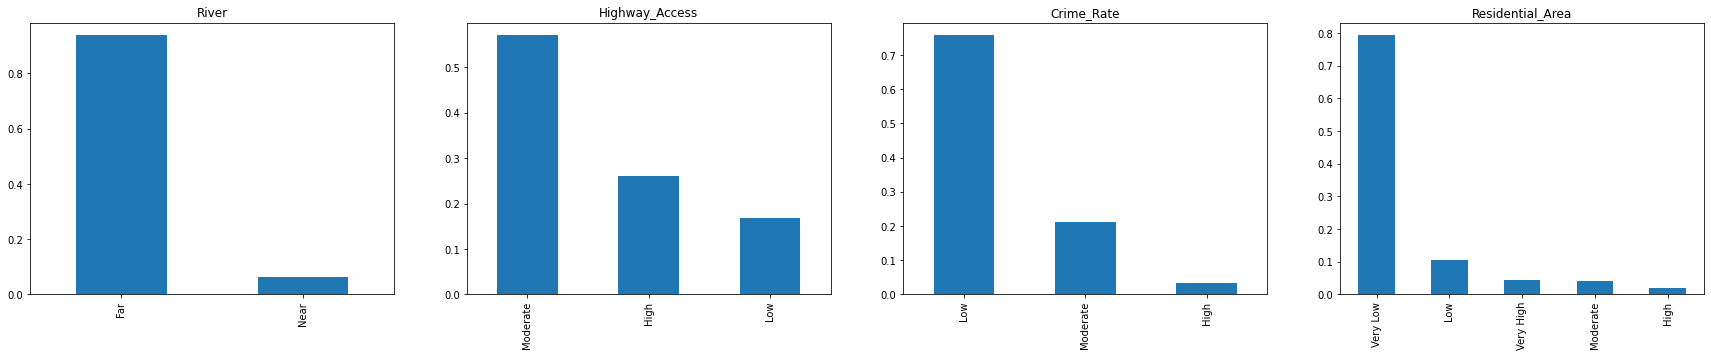

In [ ]:
#Categorical Data
datatypes = df1.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

n = len(categorical_features)

r, c = 1,4
fig, ax = plt.subplots(r, c, figsize=(30,5))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df1[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

For all the features that has been plotted above, each of them have a dominant value. The lack of variation in these variables means that these variables are likely to have less significant explanatory power on the variation in the `Price`. Thus, we will not select these features as they are not able to tell us the variations in the housing price. The  criteria we use is that we will not select features where its mode has a frequency of more than 50%.

Since from our Part I's pie chart and the above boxplot, we observe that all of the categorical features has dominant values of more than 50%, hence, no features will be selected.

In [ ]:
# get 'important' categorical features i.e. those with mode having freq < 50%

categorical_important = []

for feature in categorical_features:
    highest = df1[feature].value_counts(normalize=True)[0]
    if highest<0.5:
        categorical_important.append(feature)

if not categorical_important:
  print("There are no variables with mode contributing <50%.")
else:
    print(f"Variables with mode contributing <50% are : {categorical_important}")

There are no variables with mode contributing <50%.


Since there are no variables with mode lesser than 50%, we decided to change our criteria to not select features where its mode has a frequency of more than 60%. By removing all the categorical features, we may be underfitting the model and exclude features that might be important for our model.

In [ ]:
# get 'important' categorical features i.e. those with mode having freq < 60%

categorical_important = []

for feature in categorical_features:
    highest = df1[feature].value_counts(normalize=True)[0]
    if highest<0.6:
        categorical_important.append(feature)

if not categorical_important:
  print("There are no variables with mode contributing <60%.")
else:
    print(f"Variables with mode contributing <60% are : {categorical_important}")

Variables with mode contributing <60% are : ['Highway_Access']


Based on the criteria we would keep the categorical variable `Highway Access`. We next will look into how `Price` is related to this variable. We will plot a box plot and see the distribution of `Price` with respect to `Highway Access`.


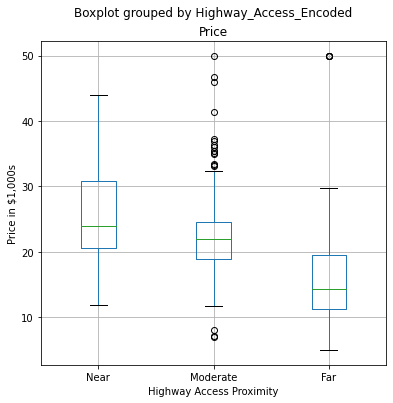

In [ ]:
df1[['Price','Highway_Access_Encoded']].boxplot(by='Highway_Access_Encoded', figsize = (6, 6))
plt.xticks([1, 2, 3], ['Near', 'Moderate', 'Far'])
plt.xlabel('Highway Access Proximity')
plt.ylabel('Price in $1,000s')
plt.show()

Based on the visual observation we noted the following:
- For `Highway Access`, those that are `Near` have a higher mean of `Price` compared to those of `Moderate` and `Far`. 

Hence based on the EDA on the categorical variable, there seem to be a potential relation of `Highway Access` to `Price`. Hence, we will keep `Highway Access`. Since we have previously encoded `Highway Access`, we will not encode it in this section.

### Numerical Variables

Since we will not be considering 'Crime_Rate_Encoded', 'Residential_Encoded' and 'River_Encoded', we drop them from df1. As such, only 'Highway_Access_Encoded' remains in the list of numerical features in df1.

In [ ]:
df1 = df1.drop(['Crime_Rate_Encoded', 'Residential_Encoded', 'River_Encoded'], axis=1)
df1.dtypes

River                      object
Student_Teacher_Ratio     float64
Highway_Access             object
Low_Income                float64
Crime_Rate                 object
Price                     float64
Pollutants                float64
Old_Housing               float64
Residential_Area           object
Tax_Rate                    int64
Distance_Office           float64
Rooms                     float64
Non_Retail                float64
Highway_Access_Encoded      int64
dtype: object

We now plot histograms to better understand the distribution of the numerical features, excluding price and highway access encoded, since price is the dependent variable and highway access has already been selected as a feature.

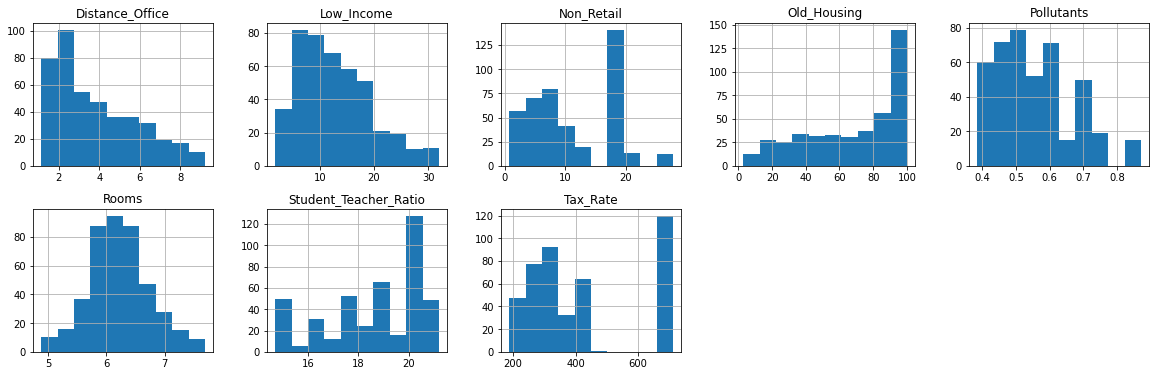

In [ ]:
datatypes = df1.dtypes
exclude = ['Highway_Access_Encoded', 'Price']
features_selected = datatypes[datatypes!="object"].index.difference(exclude)

df1[features_selected].hist(layout=(9,5), figsize=(20,30))
plt.show()

The distributions are generally not dominated by a small range of values. Next, we include price to 'features_selected' to find the correlation between the features selected and price.

In [ ]:
# features_selected.append('Price')
features_selected = datatypes[datatypes!="object"].index.difference(['Highway_Access_Encoded'])
df1[features_selected].corr()

,Distance_Office,Low_Income,Non_Retail,Old_Housing,Pollutants,Price,Rooms,Student_Teacher_Ratio,Tax_Rate
Distance_Office,1.000000,-0.535466,-0.750789,-0.740335,-0.778329,0.356001,0.264504,-0.324418,-0.574905
Low_Income,-0.535466,1.000000,0.615928,0.640729,0.615641,-0.764235,-0.569461,0.327751,0.543084
Non_Retail,-0.750789,0.615928,1.000000,0.664554,0.788221,-0.497990,-0.363347,0.334534,0.708713
Old_Housing,-0.740335,0.640729,0.664554,1.000000,0.724804,-0.476373,-0.283590,0.313518,0.524494
Pollutants,-0.778329,0.615641,0.788221,0.724804,1.000000,-0.507749,-0.331551,0.222651,0.681891
Price,0.356001,-0.764235,-0.497990,-0.476373,-0.507749,1.000000,0.573617,-0.400168,-0.481263
Rooms,0.264504,-0.569461,-0.363347,-0.283590,-0.331551,0.573617,1.000000,-0.177152,-0.199818
Student_Teacher_Ratio,-0.324418,0.327751,0.334534,0.313518,0.222651,-0.400168,-0.177152,1.000000,0.441160
Tax_Rate,-0.574905,0.543084,0.708713,0.524494,0.681891,-0.481263,-0.199818,0.441160,1.000000


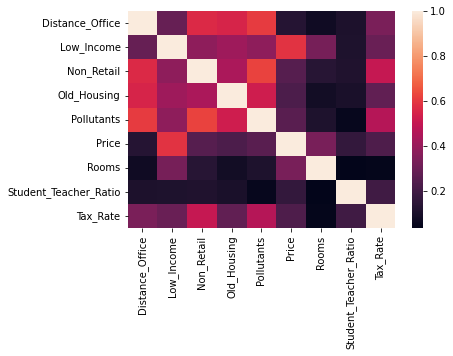

In [ ]:
import seaborn as sns
r2 = df1[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

Through the heatmap we may visually interpret that `Student_Teacher_Ratio` and `Distance_Office` have the lowest correlation to the price of homes, since they have the darkest-colored cells.

We continue by selecting features based on a threshold value of 0.5. This means that we only select features that have a correlation greater than 0.5 with `Price`

In [ ]:
#Selecting features based on a threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(df1[features_selected], 'Price', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['Low_Income', 'Pollutants', 'Rooms']


We proceed to check that the selected features are not correlated to each other. Variables that have correlation between each other will not be included in our selected features as the variable will not be useful in determining the direction of change of `Price` as changes in the variable can be a result of another variable that it is correlated to and not `Price`

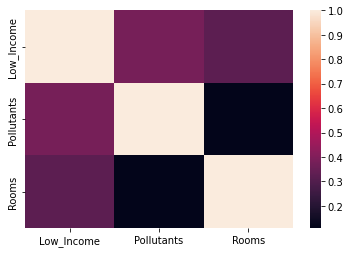

In [ ]:
r2 = df1[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

In [ ]:
abs(df1[features_selected].corr())

,Low_Income,Pollutants,Rooms
Low_Income,1.000000,0.615641,0.569461
Pollutants,0.615641,1.000000,0.331551
Rooms,0.569461,0.331551,1.000000


In [ ]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

features_selected = get_uncorr_features(df1[features_selected], 0.5)
print(f"Final selected features : {features_selected}")

Final selected features : ['Pollutants', 'Rooms']


`Low_Income` is removed from the the list of selected features as it has a correlation above 0.5 to both pollutants and rooms (as seen in the matrix above), while pollutants and rooms are not highly correlated (corr() > 0.5) to each other.

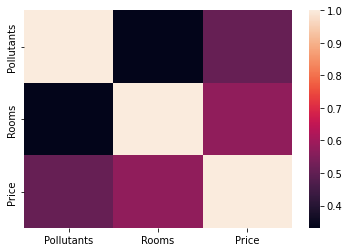

In [ ]:
df1[features_selected+['Price']].corr()
r2 = abs(df1[features_selected+['Price']].corr())
sns.heatmap(r2)

plt.show()

In [ ]:
features_selected.insert(2,"Highway_Access_Encoded")
features_selected

['Pollutants', 'Rooms', 'Highway_Access_Encoded']

**b.** Split the dataset into train and test sets. Describe how you split step by step.

We will build the regression model based on the features that we have selected: `Pollutants`, `Rooms` and `Highway_Access_Encoded`. We will split the dataset into train and test set randomly into 75/25 where 25% of the dataset will be used for model evaluation purposes.

In [ ]:
#first, we import model_selection package from sklearn
from sklearn.model_selection import train_test_split

#secondly, we add the features selected, the predictors, to X
#and Price, the response variable, to Y
X = df1[features_selected]
y = df1[["Price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

Referencing statology.org, the Ridge Regression model utilizes the bias-variance tradeoff to minimize variance, thus optimizing predictive ability rather than inference.(1)

Our variables are not highly correlated, but we are still interested in investigating the Linear Regression model's ability to predict housing prices.

We will be using Linear Regression and Ridge Regression to train our model, and we will pick the better one after testing.

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model : Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_

print("\nModel 2: Ridge Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model : Linear Regression 
--------------------------
Features : ['Pollutants', 'Rooms', 'Highway_Access_Encoded']
Coefficients: [-16.99597274   6.78161578  -2.21674269]
Intercept : -6.675332124695874
Coeff of Determination : 0.4737507958229179

Model 2: Ridge Regression
-------------------------
Features : ['Pollutants', 'Rooms', 'Highway_Access_Encoded']
Coefficients: [-12.52748775   6.93729076  -2.66922977]
Intercept : -9.187002043435761
Coeff of Determination : 0.47113346414456103


Since the covariance of `Pollutants` and `Price` is negative, an increase in the concentration of pollutants will result in a decrease in the median price of homes.

Since the covariance of `Rooms` and `Price` is positive, an increase in the number of rooms per unit will lead to an increase in the median price of homes.

Since the covariance of `Highway_Access_Encoded` and `Price` is negative, the more accessible the town is from major highways, the lower the lower the median price of homes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators = 100, random_state=42).fit(X_train, y_train.values.ravel())  # ravel() is to flatten
model3_r2 = model3.score(X_train, y_train)

print("Model 3: Random Forest (Selected Features)")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Ranking of Features: {model3.feature_importances_}")
print(f"Coeff of Determination : {model3_r2}")

Model 3: Random Forest (Selected Features)
-------------------------
Features : ['Pollutants', 'Rooms', 'Highway_Access_Encoded']
Ranking of Features: [0.47386835 0.50706234 0.01906931]
Coeff of Determination : 0.943881139318256


Since our coefficient of determination is relatively low, we went to explore more on Random Forest Regression.

Random Forest Regression is another supervised learning algorithm that uses multiple machine learning algorithm to sample out the best feature among the random subset of features, thus eventually ranking the features based on their importance using `feature_importance_` function. (2)

In model 3 (Selected Features), we used the features that we have filtered out. The goodness of fit is significantly higher than that of Logistic or Ridge Regression, where the `Pollutants` and `Rooms` features plays an important weightage in this predictive model while the `Highway Access` has negligible impact.

While it has a much higher Coefficient of determination, its inability to extrapolate beyond the range of housing prices present in the given data set inhibits its predictive ability. Hence we have opted to conduct testing on only model1 and model2. (3)

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [ ]:
#Response variable for model 1
y_pred = model1.predict(X_test)
y_pred

array([[19.7670838 ],
       [27.27082743],
       [16.82110653],
       [18.49072009],
       [16.65658198],
       [23.40848879],
       [25.57852076],
       [19.95672323],
       [28.60295367],
       [15.52756754],
       [18.48451975],
       [24.09317917],
       [30.17335319],
       [17.91201956],
       [24.65135554],
       [15.90625476],
       [24.12473899],
       [23.10306327],
       [20.7021139 ],
       [24.56531347],
       [21.22806652],
       [20.32067308],
       [17.62711362],
       [20.12526301],
       [20.61093948],
       [20.88605619],
       [18.4641749 ],
       [18.72497479],
       [22.99547538],
       [21.10139056],
       [20.1553913 ],
       [20.47003637],
       [15.97942101],
       [19.73251057],
       [26.08042561],
       [23.4731226 ],
       [30.87428475],
       [ 9.84036861],
       [ 7.87154387],
       [22.87272135],
       [27.55999778],
       [23.73408322],
       [26.80447662],
       [23.72697192],
       [20.86931182],
       [16

In [ ]:
#Response variable for model 2
y_pred = model2.predict(X_test)
y_pred

array([[19.90151117],
       [26.80498359],
       [16.42147874],
       [18.36749213],
       [16.93991093],
       [22.9673978 ],
       [25.10783971],
       [19.73110623],
       [28.22113435],
       [15.68128219],
       [18.686678  ],
       [23.60783599],
       [30.16768755],
       [18.12699494],
       [24.6338713 ],
       [15.89055878],
       [23.91220384],
       [22.59499154],
       [20.56162857],
       [24.49678188],
       [21.05592695],
       [20.06134894],
       [17.45171669],
       [19.62657273],
       [20.42463349],
       [20.65262063],
       [18.66586613],
       [19.05578461],
       [22.86071476],
       [21.0672435 ],
       [20.48821922],
       [20.19470638],
       [16.52414763],
       [19.55033303],
       [26.70307569],
       [22.92010076],
       [30.90733653],
       [11.13649348],
       [ 7.89004614],
       [23.42173716],
       [27.68702086],
       [23.59517719],
       [26.84127686],
       [23.23322229],
       [20.61119871],
       [16

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

We will be using the following evaluation methods:

`Mean Absolute Error (MAE)` is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

`Root Mean Squared Error (RMSE)` is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred, squared = False) 

print("Model1 (Linear) Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")


## model 2 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# predict based on test set
y_pred = model2.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

print("\nModel 2 (Ridge) Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model1 (Linear) Evaluation
-----------------
MAE: 3.35
MAE as % of mean: 16.1%
RMSE: 4.87

Model 2 (Ridge) Evaluation
-----------------
MAE: 3.29
MAE as % of mean: 15.8%
RMSE: 4.86


**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

The final model we have chosen is Model2, since it has a lower MAE and RMSE, indicating a lower difference between paired observations and the testing data, which in turn reflects greater predictive ability.

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

Our model implies the following predictive model:

Price = (-9.187) - 12.527 X Pollutants + 6.937 X Rooms - 2.669 X Highway_Access_Encoded


Based on our model, we found that, on average, the prediction of the median price of homes is about $3290 (15.8%) from the mean. This means that the predictions are off by about 16% on average.

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

From the project, we learned that multiple variables of different data types can influence the value of a dependent variable - in this case, housing prices. We also learned how to select valid variables craft a predictive model using both Linear and Ridge Regression.

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

1. Ng Zhi Hui Gerald: Generating ideas, Feature selection for categorical variables, editor, citations <br>
2. Su Liheng Benjamin: Writing, Implementation  for numerical variables and testing, Research. <br>
3. Seah Yi Niang: Implementation  for numerical variables and testing, Research, Conclusion.<br>
4. Tan Yao Long: Leadership, feature selection for categorical variables, Brainstorming

**b.** List any references and sources you have cited.

(1) 
Zach. (2021, August 26). When to use Ridge &amp; Lasso regression. Statology. Retrieved April 12, 2022, from https://www.statology.org/when-to-use-ridge-lasso-regression/ 

(2)
Donges, N. (n.d.). A complete guide to the random forest algorithm. Built In. Retrieved April 14, 2022, from https://builtin.com/data-science/random-forest-algorithm 

(3) Bakshi, C. (2022, April 14). Random Forest regression. Medium. Retrieved April 14, 2022, from https://levelup.gitconnected.com/random-forest-regression-209c0f354c84 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1fcf3f3-42ac-4a1a-92f5-07beb57a2968' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>